In [1]:
import navis
import flybrains

import navis.interfaces.neuprint as neu

from fafbseg import flywire
import fafbseg.flywire.NeuronCriteria as NC

client = neu.Client("https://neuprint.janelia.org", dataset="hemibrain:v1.2.1")

In [3]:
# Fetch a couple neurons on the left side of the brain
# (note that "side" always refers to where the soma is)
meshes = flywire.get_mesh_neuron(
    NC(type="DA1_lPN", side="left"), dataset="flat_630", lod=3
)

# Slightly downsample neurons for visualization
meshes = navis.downsample_neuron(meshes, 5)

Found 8 neurons matching the given criteria.


Fetching:   0%|          | 0/8 [00:00<?, ?it/s]

Downsampling:   0%|          | 0/8 [00:00<?, ?it/s]

Plot neurons:   0%|          | 0/8 [00:00<?, ?it/s]

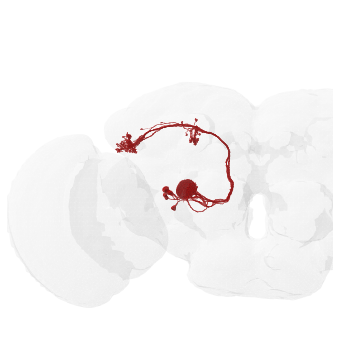

In [8]:
# Visualize the neurons
fig, ax = navis.plot2d(meshes, color="red")
# Add the neuropil
_ = navis.plot2d(flybrains.FLYWIRE, color=(0.8, 0.8, 0.8, 0.05), ax=ax)

ax.elev = -90  # rotate brain to frontal view
ax.set_box_aspect(None, zoom=0.7)  # zoom out slightly

In [10]:
sa13_hb = neu.fetch_mesh_neuron(neu.NeuronCriteria(type=("SA1", "SA2", "SA3")), lod=3)

Fetching:   0%|          | 0/8 [00:00<?, ?it/s]

Plot neurons:   0%|          | 0/8 [00:00<?, ?it/s]

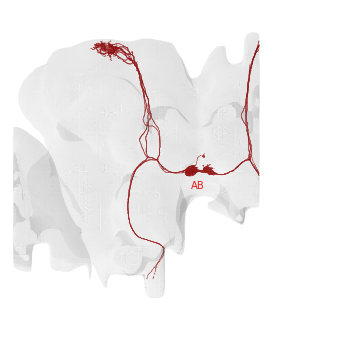

In [11]:
fig, ax = navis.plot2d(sa13_hb, color="red")
_ = navis.plot2d(flybrains.JRCFIB2018Fraw, color=(0.8, 0.8, 0.8, 0.1), ax=ax)
ax.text3D(25909, 21760, 24709, "AB", c="red", ha="center")
ax.elev = -180  # rotate brain to frontal view

In [12]:
# Fetch SA1-3 cells in FlyWire
sa13 = flywire.search_annotations(
    "hemibrain_type:SA[1-3]", materialization=630, regex=True
)
sa13_fw = flywire.get_mesh_neuron(sa13.root_id.values, dataset="flat_630", lod=3)
sa13_fw = navis.downsample_neuron(sa13_fw, 5)  # slightly downsample for visualization

Fetching:   0%|          | 0/28 [00:00<?, ?it/s]

Downsampling:   0%|          | 0/28 [00:00<?, ?it/s]

Plot neurons:   0%|          | 0/28 [00:00<?, ?it/s]

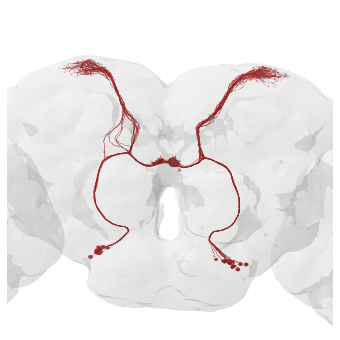

In [13]:
fig, ax = navis.plot2d(sa13_fw, color="red")
_ = navis.plot2d(flybrains.FLYWIRE, color=(0.8, 0.8, 0.8, 0.1), ax=ax)
ax.elev = -90  # rotate brain to frontal view

In [14]:
# Mirror neurons left/right
sa13_fw_mirr = navis.mirror_brain(sa13_fw, template="FLYWIRE")

Mirroring:   0%|          | 0/28 [00:00<?, ?it/s]

Plot neurons:   0%|          | 0/28 [00:00<?, ?it/s]

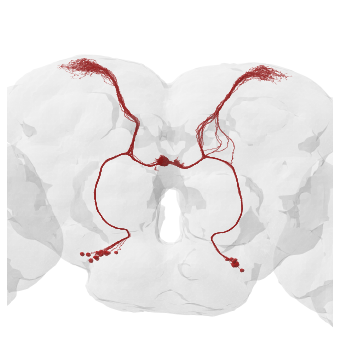

In [65]:
# Plot mirrored neurons in red
fig, ax = navis.plot2d(sa13_fw_mirr, color="r")
_ = navis.plot2d(flybrains.FLYWIRE, color=(0.8, 0.8, 0.8, 0.1), ax=ax)
ax.elev = -90  # rotate brain to frontal view